In [1]:
cd ..

/home/araxal/coursework


In [2]:
import numpy as np
import torch
from torch import nn
from utils.genre_classification import evaluate, executor
from utils.decade_classification import feature_preparator
from utils.genre_classification.random_features_slicer import random_features_slicer
from utils.genre_classification.plot_metrics import plot_metrics
from models.genre_classification.FeedForwardModel import FeedForwardModel
from utils.genre_classification.plot_confusion_matrix import plot_confusion_matrix

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
BATCH_SIZE = 8
NUM_CLASSES = 4
DEVICE = torch.device('cuda')

In [5]:
%%time
train_data_loader, val_data_loader, test_data_loader, idx_to_label = feature_preparator(
    'features/decade_classification/melgram.p',
    BATCH_SIZE,
    transform=random_features_slicer,
    normalize=False
)

def transform_idx_to_label(x):
    return idx_to_label[x]

CPU times: user 71.5 ms, sys: 260 ms, total: 332 ms
Wall time: 435 ms


In [6]:
next(iter(train_data_loader))[0].shape

torch.Size([8, 256, 128])

In [7]:
train_labels = []
val_labels = []
test_labels = []

for x, label in train_data_loader:
    train_labels.append(label)

for x, label in val_data_loader:
    val_labels.append(label)

for x, label in test_data_loader:
    test_labels.append(label)

print('Train', np.unique(torch.cat(train_labels).numpy(), return_counts=True))
print('Val', np.unique(torch.cat(val_labels).numpy(), return_counts=True))
print('Test', np.unique(torch.cat(test_labels).numpy(), return_counts=True))
print(idx_to_label)

Train (array([0, 1, 2, 3]), array([244, 237, 224, 247]))
Val (array([0, 1, 2, 3]), array([51, 51, 47, 51]))
Test (array([0, 1, 2, 3]), array([51, 49, 46, 54]))
{0: '1990', 1: '2000', 2: '2010', 3: 'old'}


## Перцептрон

 24%|██▍       | 24/100 [00:17<00:56,  1.36it/s]

Early stop!


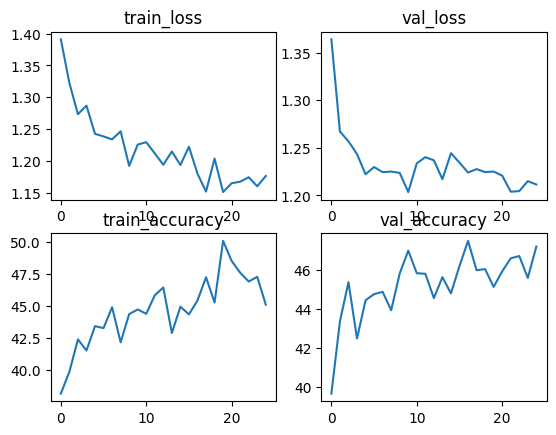

In [8]:
ff_simple_model = FeedForwardModel(256 * 128, NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, ff_simple_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.001))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

        1990       0.62      0.10      0.17        51
        2000       0.41      0.76      0.53        49
        2010       0.75      0.31      0.44        48
         old       0.46      0.73      0.57        52

    accuracy                           0.48       200
   macro avg       0.56      0.47      0.43       200
weighted avg       0.56      0.47      0.43       200



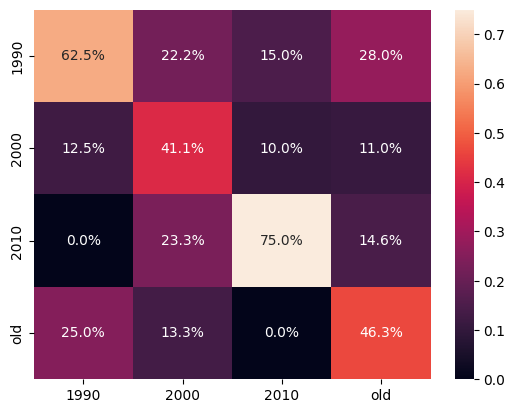

In [9]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, ff_simple_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Свертка по времени

 22%|██▏       | 22/100 [00:26<01:35,  1.23s/it]

Early stop!


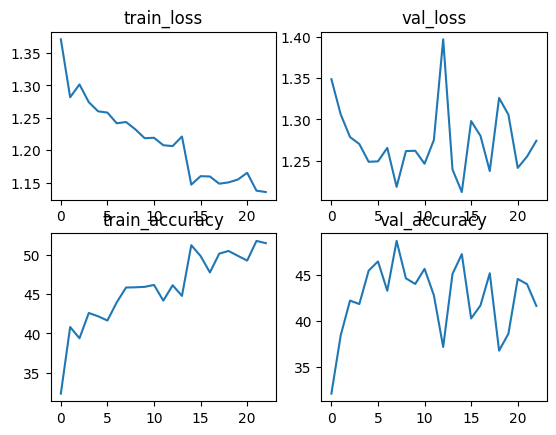

In [10]:
from models.genre_classification.Conv1Model import Conv1Model

conv_1_model = Conv1Model(NUM_CLASSES, time_size=256).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_1_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

        1990       0.54      0.53      0.53        53
        2000       0.45      0.53      0.49        49
        2010       0.55      0.48      0.51        46
         old       0.72      0.69      0.71        52

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.57      0.56      0.56       200



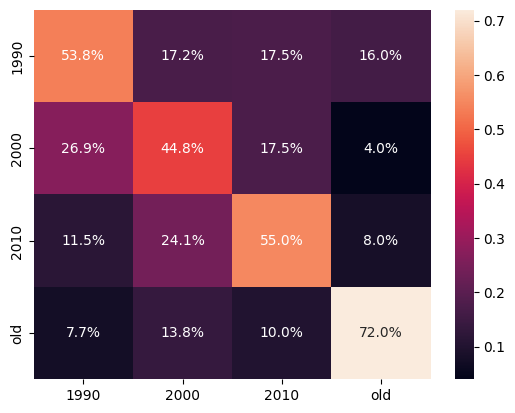

In [11]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_1_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Свертка по фичам

 41%|████      | 41/100 [00:50<01:12,  1.23s/it]

Early stop!


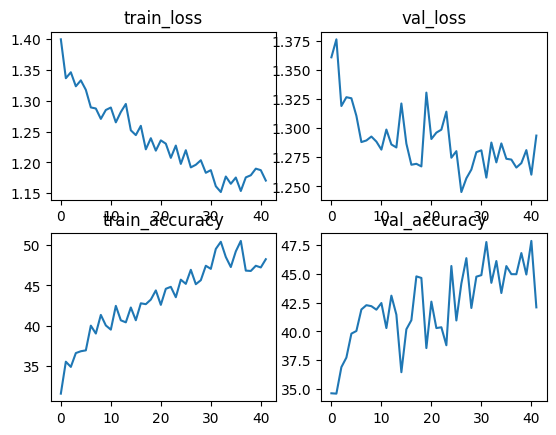

In [13]:
from models.genre_classification.Conv2Model import Conv2Model

conv_2_model = Conv2Model(NUM_CLASSES, 128, 256).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_2_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

        1990       0.35      0.65      0.46        52
        2000       0.39      0.29      0.33        49
        2010       0.51      0.40      0.45        47
         old       0.84      0.50      0.63        52

    accuracy                           0.47       200
   macro avg       0.52      0.46      0.47       200
weighted avg       0.53      0.47      0.47       200



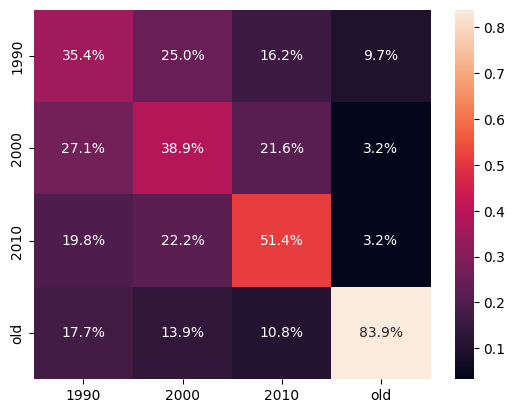

In [14]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_2_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## LSTM

 52%|█████▏    | 52/100 [01:04<00:59,  1.24s/it]

Early stop!


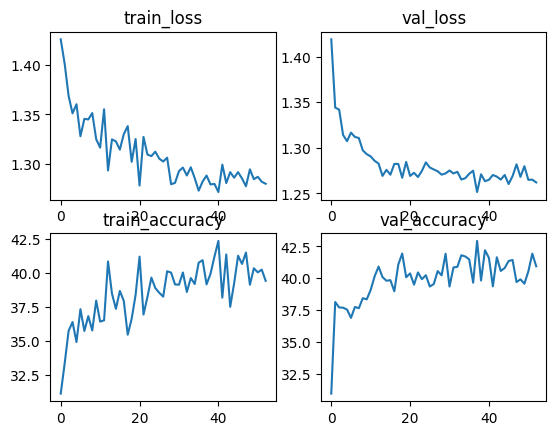

In [15]:
from models.genre_classification.LSTMModel import LSTMModel

lstm_simple_model = LSTMModel(128, 1024, NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, lstm_simple_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=1e-4, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.001))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

        1990       0.35      0.23      0.28        53
        2000       0.42      0.31      0.36        48
        2010       0.42      0.33      0.37        48
         old       0.39      0.71      0.50        51

    accuracy                           0.40       200
   macro avg       0.40      0.39      0.38       200
weighted avg       0.39      0.40      0.38       200



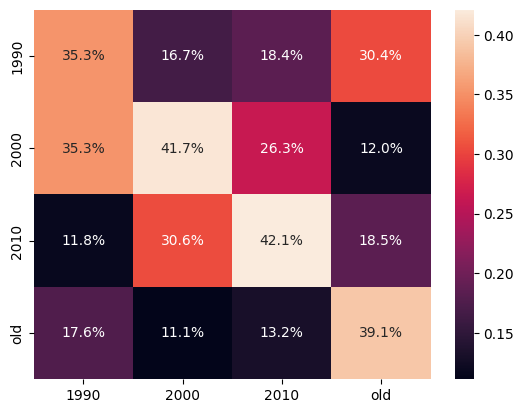

In [16]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, lstm_simple_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Свертка по времени и фичам

 39%|███▉      | 39/100 [00:35<00:55,  1.10it/s]

Early stop!


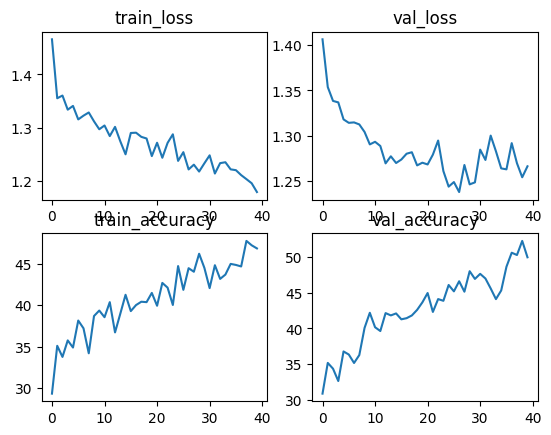

In [17]:
from models.genre_classification.Conv3Model import Conv3Model

conv_3_model = Conv3Model(NUM_CLASSES, 256, 128).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_3_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

        1990       0.56      0.35      0.43        52
        2000       0.43      0.45      0.44        51
        2010       0.54      0.47      0.50        45
         old       0.51      0.73      0.60        52

    accuracy                           0.50       200
   macro avg       0.51      0.50      0.49       200
weighted avg       0.51      0.50      0.49       200



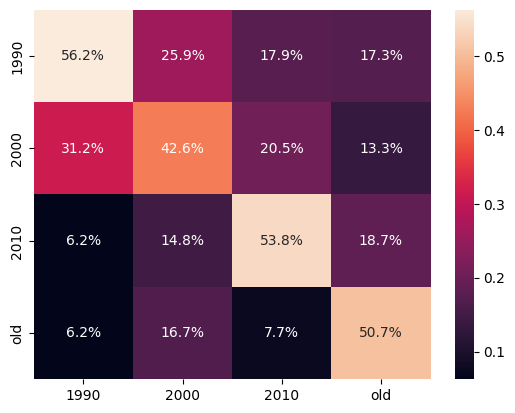

In [18]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_3_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## CRNN

 44%|████▍     | 44/100 [01:03<01:20,  1.44s/it]

Early stop!


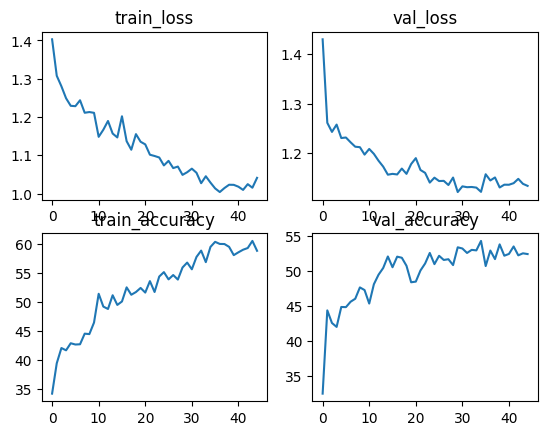

In [19]:
from models.genre_classification.CRNNModel import CRNNModel

crnn_model = CRNNModel(256, 128, NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, crnn_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

        1990       0.41      0.58      0.48        50
        2000       0.44      0.31      0.37        51
        2010       0.55      0.51      0.53        47
         old       0.73      0.69      0.71        52

    accuracy                           0.53       200
   macro avg       0.53      0.52      0.52       200
weighted avg       0.53      0.53      0.52       200



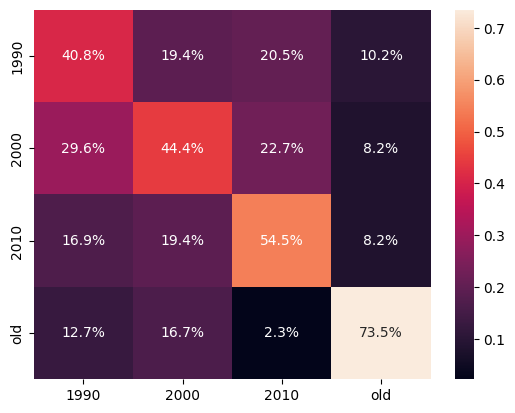

In [20]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, crnn_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Трансформер

  1%|          | 1/100 [00:01<03:07,  1.90s/it]

1.383992030840962 1.3839649599790573


  2%|▏         | 2/100 [00:04<03:20,  2.04s/it]

1.3521172158858354 1.3550819402933119


  3%|▎         | 3/100 [00:06<03:20,  2.07s/it]

1.328381732732308 1.334439589381218


  4%|▍         | 4/100 [00:08<03:19,  2.07s/it]

1.3102075632880716 1.3137211143970489


  5%|▌         | 5/100 [00:10<03:12,  2.02s/it]

1.304344392624222 1.291667839884758


  6%|▌         | 6/100 [00:12<03:07,  2.00s/it]

1.2950814882246386 1.2762279173731803


  7%|▋         | 7/100 [00:14<03:07,  2.01s/it]

1.268098190051167 1.2749483856558799


  8%|▊         | 8/100 [00:16<03:06,  2.02s/it]

1.273552578537404 1.2572418963909149


  9%|▉         | 9/100 [00:18<03:03,  2.02s/it]

1.26220031195328 1.2490894508361816


 10%|█         | 10/100 [00:20<03:01,  2.01s/it]

1.2484610296097123 1.2430154886841773


 11%|█         | 11/100 [00:22<02:58,  2.01s/it]

1.2499550906549983 1.2344547787308693


 12%|█▏        | 12/100 [00:24<02:56,  2.00s/it]

1.2396613835286694 1.2286150306463242


 13%|█▎        | 13/100 [00:26<02:53,  2.00s/it]

1.236999498195007 1.2186494961380958


 14%|█▍        | 14/100 [00:28<02:51,  1.99s/it]

1.2227274429898303 1.2130455189943314


 15%|█▌        | 15/100 [00:30<02:49,  1.99s/it]

1.2294577815953422 1.207688040435314


 16%|█▌        | 16/100 [00:32<02:45,  1.97s/it]

1.2186624638172758 1.2012635958194733


 17%|█▋        | 17/100 [00:33<02:41,  1.94s/it]

1.2177572390612434 1.1959347689151765


 18%|█▊        | 18/100 [00:35<02:40,  1.95s/it]

1.2021729004483264 1.1892888715863228


 19%|█▉        | 19/100 [00:37<02:38,  1.96s/it]

1.2075397677782203 1.1876509830355644


 20%|██        | 20/100 [00:39<02:34,  1.93s/it]

1.1867096980078882 1.1867392411828042


 21%|██        | 21/100 [00:41<02:30,  1.91s/it]

1.1966765322605102 1.179992039501667


 22%|██▏       | 22/100 [00:43<02:27,  1.89s/it]

1.2001345207711227 1.181506382226944


 23%|██▎       | 23/100 [00:45<02:26,  1.90s/it]

1.1850359810500586 1.172708154320717


 24%|██▍       | 24/100 [00:47<02:22,  1.87s/it]

1.1769519323060493 1.1673845171928405


 25%|██▌       | 25/100 [00:49<02:19,  1.86s/it]

1.1740334099080383 1.1608232951164243


 26%|██▌       | 26/100 [00:50<02:18,  1.87s/it]

1.1768305326710229 1.1722100815176963


 27%|██▋       | 27/100 [00:52<02:18,  1.89s/it]

1.1687895485333033 1.155519549548626


 28%|██▊       | 28/100 [00:54<02:17,  1.91s/it]

1.1637088065387822 1.1585470134019853


 29%|██▉       | 29/100 [00:56<02:16,  1.93s/it]

1.1835784917118168 1.1644080838561055


 30%|███       | 30/100 [00:58<02:15,  1.94s/it]

1.1705658345663248 1.1761049732565878


 31%|███       | 31/100 [01:00<02:14,  1.95s/it]

1.1530818463373584 1.1643322005867958


 32%|███▏      | 32/100 [01:02<02:12,  1.95s/it]

1.163741963751176 1.156064379811287


 33%|███▎      | 33/100 [01:04<02:11,  1.96s/it]

1.1473273649936964 1.1724194717407226


 34%|███▍      | 34/100 [01:06<02:08,  1.95s/it]

1.1561850614908362 1.1466877011954784


 35%|███▌      | 35/100 [01:08<02:06,  1.94s/it]

1.1667232077662684 1.1652470573782918


 36%|███▌      | 36/100 [01:10<02:05,  1.96s/it]

1.155350991657802 1.1664952474832533


 37%|███▋      | 37/100 [01:12<02:04,  1.98s/it]

1.1432565555853003 1.1574187350273133


 38%|███▊      | 38/100 [01:14<02:03,  1.99s/it]

1.1632343761059416 1.16135982722044


 39%|███▉      | 39/100 [01:16<02:00,  1.98s/it]

1.145565227300179 1.1675150856375693


 40%|████      | 40/100 [01:18<01:59,  1.99s/it]

1.1556732469246167 1.1503183209896086


 41%|████      | 41/100 [01:20<01:58,  2.01s/it]

1.1443788875050906 1.15405767172575


 42%|████▏     | 42/100 [01:22<01:57,  2.02s/it]

1.1453390732532789 1.1416138485074043


 43%|████▎     | 43/100 [01:24<01:55,  2.02s/it]

1.143189719745091 1.1456834056973455


 44%|████▍     | 44/100 [01:26<01:53,  2.03s/it]

1.1583183077203125 1.1549705639481544


 45%|████▌     | 45/100 [01:28<01:51,  2.02s/it]

1.152416711594878 1.1558793678879737


 46%|████▌     | 46/100 [01:30<01:46,  1.98s/it]

1.149993910008118 1.1445511406660078


 47%|████▋     | 47/100 [01:32<01:43,  1.95s/it]

1.1378176362574601 1.1486785142123699


 48%|████▊     | 48/100 [01:34<01:39,  1.92s/it]

1.1574126066280013 1.1614418619871139


 48%|████▊     | 48/100 [01:36<01:44,  2.00s/it]

1.1511406547882979 1.1515685787796976
Early stop!


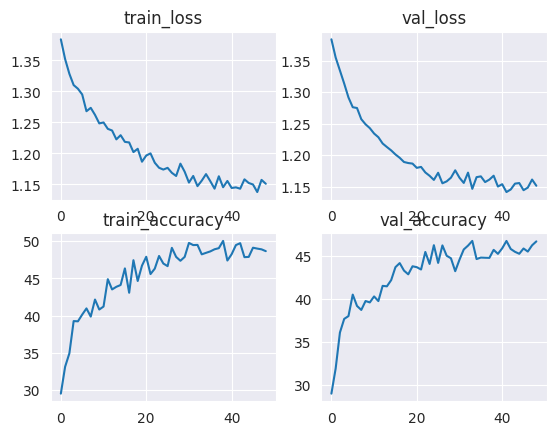

In [22]:
from models.genre_classification.TransformerModel import TransformerModel

transformer_model = TransformerModel(
    input_dim=128,
    num_layers=6,
    output_dim=NUM_CLASSES,
    num_heads=16,
    dropout=0.1,
    hidden_dim=256
).to(DEVICE)
train_progress, val_progress = executor(
    DEVICE,
    transformer_model,
    train_dataloader = train_data_loader,
    val_dataloader=val_data_loader,
    epochs=100,
    learning_rate=0.00001,
    weight_decay=0.01,
    evaluate_per_iteration=15,
    early_stop_after=(15,  0.01),
    print_metrics=True
)

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

        1990       0.53      0.45      0.49        53
        2000       0.46      0.49      0.48        49
        2010       0.49      0.43      0.46        46
         old       0.58      0.69      0.63        52

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.52       200



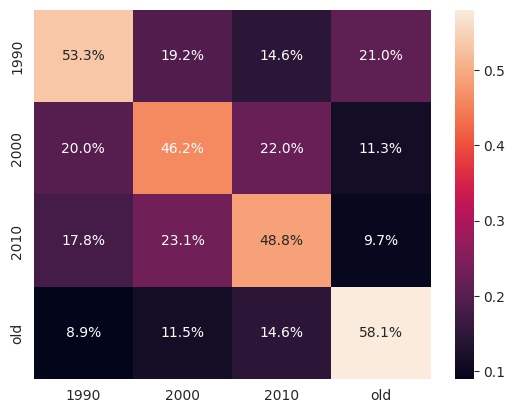

In [23]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, transformer_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)